Load relevant modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.core.sphere import disperse_charges, HemiSphere
from dipy.sims.voxel import (multi_tensor_dki, single_tensor, multi_tensor, 
                             _check_directions, all_tensor_evecs)
from dipy.data import (get_fnames, get_sphere)
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import (decompose_tensor, from_lower_triangular)
from dipy.sims.voxel import add_noise
from dipy.data import get_sphere
from dipy.reconst.dti import fractional_anisotropy
from dipy.viz import window, actor
import dipy.reconst.dki as dki
import dipy.reconst.msdki as msdki
sphere = get_sphere('repulsion724')

Define gradient table

In [2]:
fraw, fbval, fbvec, t1_fname = get_fnames('cfin_multib')
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

# Voxel Case 1 (Single Tensor)

Define diffusivities of voxel case 1

In [3]:
eval1 = [1.7e-3, 0.3e-3, 0.3e-3];
angle = [(130.0, 0.0)]
stick = _check_directions(angle)
evec1 = all_tensor_evecs(stick[0])

Plot diffusion tensor of voxel case 1

In [4]:
evals = np.array([[[eval1]]])
evecs = np.array([[[evec1]]])

# colors
color1 = np.zeros(evals.shape)
color1[0, 0, 0, 0] = 1;  #red

ren = window.Renderer()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=color1, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(90)
ren.add(tensor_actor)

window.record(ren, n_frames=1, out_path='case1.png', size=(600, 600))

Generate signal

In [5]:
signal1 = single_tensor(gtab, S0=1, evals=eval1, evecs=evec1, snr=None)

# Voxel Case 2 (Intra - and extra-cellular Tensor)

In [6]:
eval1 = [1e-3, 0.1e-3, 0.1e-3]
eval2 = [2e-3, 0.6e-3, 0.6e-3]
angle1 = (130.0, 0.0)
angle2 = (130.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])

In [7]:
evals = np.array([[[eval1, eval2]]])
evecs =  np.array([[[evec1, evec2]]])

colors = np.zeros(evals.shape)
colors[0, 0, 0, 2] = 1;  # blue
colors[0, 0, 1, 0] = 1;  # yellow
colors[0, 0, 1, 1] = 1;  

ren = window.Renderer()

FA = fractional_anisotropy(evals)
tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(90)
ren.add(tensor_actor)

window.record(ren, n_frames=1, out_path='case2.png', size=(600, 600))

In [8]:
mevals = [eval1, eval2]
S0 = 1
angles = [angle1, angle2]
fractions = [50, 50]
signal2, st = multi_tensor(gtab, mevals, S0, angles, fractions, snr=None)

In [9]:
signal2

array([1.        , 0.77856723, 0.88973747, 0.88857928, 0.78083523,
       0.81638387, 0.8636026 , 0.90165858, 0.75460142, 0.86446751,
       0.91065436, 0.93301714, 0.91451103, 0.93189803, 0.92771265,
       0.90734162, 0.85756717, 0.77888326, 0.92892692, 0.84449368,
       0.90423212, 0.92242338, 0.80387319, 0.92066044, 0.80950624,
       0.81472479, 0.87638121, 0.91240333, 0.92954524, 0.75112872,
       0.9298683 , 0.85943909, 0.84913602, 0.89070242, 0.61041598,
       0.79512336, 0.79269579, 0.61363059, 0.6697392 , 0.75047817,
       0.81625987, 0.57438285, 0.74855227, 0.83169391, 0.87279383,
       0.83928759, 0.87090499, 0.86254083, 0.82483056, 0.73826129,
       0.61142866, 0.86495891, 0.71561963, 0.82025614, 0.85324141,
       0.64991642, 0.84945947, 0.65887846, 0.66713358, 0.77056673,
       0.83451779, 0.86596608, 0.5693815 , 0.86707346, 0.74175199,
       0.72352051, 0.79706086, 0.48218047, 0.71302876, 0.71012879,
       0.48609476, 0.55230875, 0.65449575, 0.74170347, 0.44097

# Voxel case 3 (simplistic model of axonal "degeneration")

In [10]:
eval1 = [1e-3, 0.1e-3, 0.1e-3]
eval2 = [2e-3, 0.7e-3, 0.7e-3]
angle1 = (130.0, 0.0)
angle2 = (130.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])

In [11]:
colors = np.zeros(evals.shape)
colors[0, 0, 0, 2] = 1;  # blue
colors[0, 0, 1, 0] = 1;  # orange
colors[0, 0, 1, 1] = 0.5;  

evals = np.array([[[eval1, eval2]]])
evecs =  np.array([[[evec1, evec2]]])

ren = window.Renderer()

FA = fractional_anisotropy(evals)
tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=1)
tensor_actor.display(y=0)
tensor_actor.RotateX(90)
ren.add(tensor_actor)

window.record(ren, n_frames=1, out_path='case3.png', size=(600, 600))

In [12]:
mevals = [eval1, eval2]
S0 = 1
angles = [angle1, angle2]
fractions = [30, 70]
signal3, st = multi_tensor(gtab, mevals, S0, angles, fractions, snr=None)

# Voxel Case 4 (Crossing Fibers  )¶

In [13]:
eval1 = [1e-3, 0.1e-3, 0.1e-3]
eval2 = [2e-3, 0.6e-3, 0.6e-3]
eval3 = [1e-3, 0.1e-3, 0.1e-3]
eval4 = [2e-3, 0.6e-3, 0.6e-3]
angle1 = (30.0, 0.0)
angle2 = (30.0, 0.0)
angle3 = (150.0, 0.0)
angle4 = (150.0, 0.0)
stick1 = _check_directions([angle1])
stick2 = _check_directions([angle2])
stick3 = _check_directions([angle3])
stick4 = _check_directions([angle4])
evec1 = all_tensor_evecs(stick1[0])
evec2 = all_tensor_evecs(stick2[0])
evec3 = all_tensor_evecs(stick3[0])
evec4 = all_tensor_evecs(stick4[0])

In [14]:
evals = np.array([np.array([[eval1, eval2]]),
                   np.array([[eval3, eval4]])])
angle = [(40.0, 0.0), (140.0, 0.0)]
stick = _check_directions(angle)
evecs =  np.array([[[evec1, evec2]],
                   [[evec3, evec4]]])

colors = np.zeros(evals.shape)

colors[0, 0, 0, 2] = 1;  #Blue

colors[0, 0, 1, 0] = 1;  #Yellow
colors[0, 0, 1, 1] = 1;

colors[1, 0, 0, 2] = 1;  #Blue

colors[1, 0, 1, 0] = 1;  #Yellow
colors[1, 0, 1, 1] = 1;

ren = window.Renderer()

tensor_actor = actor.tensor_slicer(evals, evecs, scalar_colors=colors, sphere=sphere, scale=0.8)
tensor_actor.display(y=0)
tensor_actor.RotateX(90)
ren.add(tensor_actor)

window.record(ren, n_frames=1, out_path='case4.png', size=(600, 600))

In [15]:
mevals = [eval1, eval2, eval3, eval4]
S0 = 1
angles = [angle1, angle2, angle3, angle4]
fractions = [25.0, 25.0, 25.0, 25.0]
signal4, st = multi_tensor(gtab, mevals, S0, angles, fractions, snr=None)

# Process DKI metrics

In [16]:
dwi = np.zeros((4,) + gtab.bvals.shape)
dwi[0, :] = signal1
dwi[1, :] = signal2
dwi[2, :] = signal3
dwi[3, :] = signal4

Define reconstruction models

In [17]:
dki_model = dki.DiffusionKurtosisModel(gtab, fit_method='NLS')
dki_fit = dki_model.fit(dwi)
fa = dki_fit.fa
md = dki_fit.md
rd = dki_fit.rd
ad = dki_fit.ad
mk = dki_fit.mk()
rk = dki_fit.rk()
ak = dki_fit.ak()
mkt = dki_fit.mkt()
kfa = dki_fit.kfa

msdki_model = msdki.MeanDiffusionKurtosisModel(gtab)
msdki_fit = msdki_model.fit(dwi)
msk = msdki_fit.msk

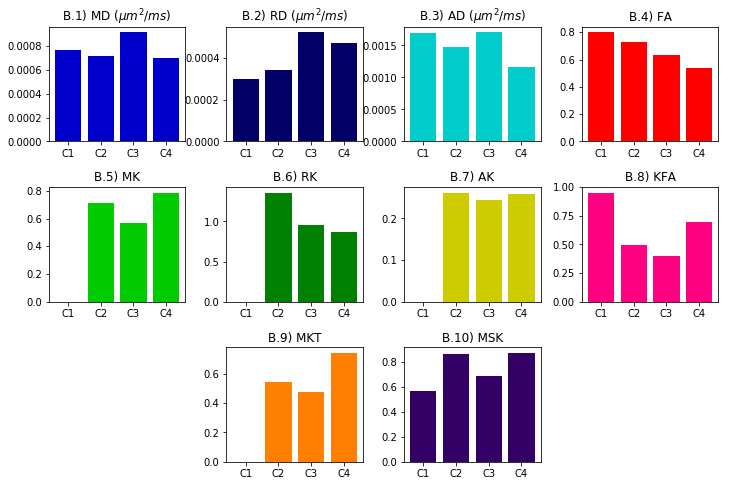

In [18]:
cases = [1, 2, 3, 4]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].bar(cases, md, linewidth=1.0, color=[0.0, 0.0, 0.8])
axs[0, 0].set_title('B.1) MD ($\mu m^2/ms$)')
axs[0, 1].bar(cases, rd, linewidth=1.0, color=[0.0, 0.0, 0.4])
axs[0, 1].set_title('B.2) RD ($\mu m^2/ms$)')
axs[0, 2].bar(cases, ad, linewidth=1.0, color=[0.0, 0.8, 0.8])
axs[0, 2].set_title('B.3) AD ($\mu m^2/ms$)')
axs[0, 3].bar(cases, fa, linewidth=1.0, color=[1.0, 0.0, 0.0])
axs[0, 3].set_title('B.4) FA')

axs[1, 0].bar(cases, mk, linewidth=1.0, color=[0.0, 0.8, 0.0])
axs[1, 0].set_title('B.5) MK')
axs[1, 1].bar(cases, rk, linewidth=1.0, color=[0.0, 0.5, 0.0])
axs[1, 1].set_title('B.6) RK')
axs[1, 2].bar(cases, ak, linewidth=1.0, color=[0.8, 0.8, 0.0])
axs[1, 2].set_title('B.7) AK')
axs[1, 3].bar(cases, kfa, linewidth=1.0, color=[1.0, 0.0, 0.5])
axs[1, 3].set_title('B.8) KFA')

axs[2, 1].bar(cases, mkt, linewidth=1.0, color=[1.0, 0.5, 0.0])
axs[2, 1].set_title('B.9) MKT')
axs[2, 2].bar(cases, msk, linewidth=1.0, color=[0.2, 0.0, 0.4])
axs[2, 2].set_title('B.10) MSK')

for ii in range(3):
    for jj in range(4):
        axs[ii, jj].set_xticks(cases)
        axs[ii, jj].set_xticklabels(['C1', 'C2', 'C3', 'C4'])
axs[2, 0].axis('off')
axs[2, 3].axis('off')
        
fig.savefig('DKImetrics.png', bbox_inches='tight')